from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important;}</style>"))

# PROJECT SETUP

Made by:

|Nome|Matricula|
|-|-|
|Cleanderson Lins Coutinho|11409558|
|Jaqueline Donin Noleto|20160144455|
|Lucas Nogueira Nobrega|2016017049|    

### IMPORTS

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import sys
import math
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### COLLECTING DATA

In [2]:
subjects_quantity = 40
sbj_photos = 10

people_raw = list() # ALL 10 PHOTOS FROM EACH PERSON
people_subjects = list() # FIRST PHOTO FROM EACH PERSON
people_dataset_raw = list() # 9 PHOTOS FOR EACH PERSON DATASET

for j in range(1, subjects_quantity+1):
    # For para cada imagem
    for i in range(1, sbj_photos+1):
        people_raw.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))
        if i == 1:
            people_subjects.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))
        if i != 1:
            people_dataset_raw.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))

In [3]:
print(f"Dataset size: {len(people_dataset_raw)}")

Dataset size: 360


### RAW DATA SHOW UP

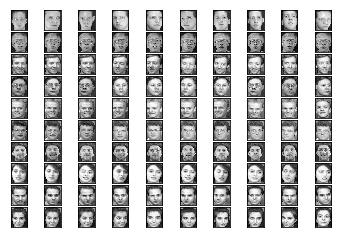

In [4]:
nrows, ncols = 10, 10

for j in range(0,nrows*ncols,10):
    for i in range(1,11):
        plt.subplot(nrows, ncols, i + j)
        plt.imshow(people_raw[i-1 + j], cmap = 'gray')
        plt.xticks([]), plt.yticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.show()

### BELOW, ALL THE ARRAYS ARE DATASET ONLY

Creating an array with fourier transform from raw data set array:

In [5]:
people_fft = [np.fft.fft2(person) for person in people_dataset_raw]

people_unique_fft = [np.fft.fft2(person) for person in people_subjects]

'people_fft' is now an array containing a fourier transformed version of each photo from the dataset.

To conclude an ideal analysis, the original fourier transformed image is not the easiest data to work with, so, the purpose of the next command is to create a  version of each imagem with it's relative relevant data shifted to the center of the picture.

In [6]:
people_fft_s = [np.fft.fftshift(person) for person in people_fft]

people_unique_fft_s = [np.fft.fftshift(person) for person in people_unique_fft]

Now, showing one example from the raw data, the fourier transformed, and the shifted one:

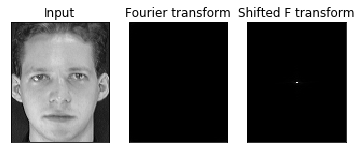

In [7]:
plt.subplot(131)
plt.imshow(people_raw[0], cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(np.abs(people_fft[0]), cmap = 'gray')
plt.title('Fourier transform'), plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(np.abs(people_fft_s[0]), cmap = 'gray')
plt.title('Shifted F transform'), plt.xticks([]), plt.yticks([])

plt.show()

### FINISHED SETUP

## STARTING THE PROJECT

The next part of the project consists in:

1. Create the list of redimensioned image
1. Analyze the Mean Square Error (MSE)
1. Classify samples from MSE


### 1. Create the list of redimensioned image:
    we need to create a function that returns only the relevant part of the image. That integer input will be the dimensions of the usable image data. The dimensions used in this projest are: 2x2 until 30x30

In [8]:
#cut image according to the last dimension
def crop_img(n, image):
    #current dimensions of imagens in the database
    image_width = 92
    image_height = 112
    
    # center of the image
    x = image_height//2
    y = image_width//2
    
    # RADIUS OF THE AREA
    r = n//2
    
    odd = 0
    #testing if image is odd
    if n % 2 != 0:
        odd = -1
    
    return image[x-r+odd:x+r,y-r+odd:y+r]

In [9]:
people = np.array(people_fft_s)
people.shape

(360, 112, 92)

In [10]:
cropped = crop_img(30, people_raw[0])
cropped.shape

(30, 30)

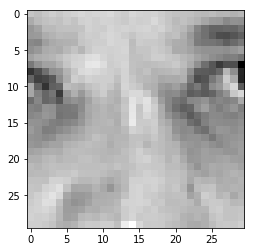

In [11]:
#show redimensioned image
plt.imshow(cropped, "gray")

### 2. Analyze the Mean Square Error (MSE):
    we need to create a function that calculate the distante between the samples and the image that we want classify, for that we testing two algorits:

1. First case with SkLearn


2. Second case with other implementation

Cropped all datasets

In [12]:
#define dimension range
dimension = 30
#to original image, labeled
crop_full = []
# to each user, labeless
crop_unique = []
# to add crop image in crop_full, unidimensional array
for image in people_fft_s:
    crop_full.append(np.array(crop_img(dimension, image)).flatten())
    
# to add crop image in crop_full, unidimensional array  
for image in people_unique_fft_s:
    crop_unique.append(np.array(crop_img(dimension, image)).flatten())

### 1. First case with SkLearn

In [13]:
X = np.array(crop_full)
X.shape

(360, 900)

##### Labels to KNN

In [14]:
labels = [i for i in range(40) for j in range(9)]
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 3

#### Declaring machine learn

In [15]:
#constructor of KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=1, metric="euclidean")

In [16]:
#fit receive parameters to learn
neigh.fit(X.real, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
y_predict = []

for image in crop_unique:
    y_predict.append(neigh.predict([image.real]))
    print(neigh.predict([image.real]), end= " ")
#casting to transform the array in np_array
y_predict = np.array(y_predict)



[0] [1] [2] [3] [4] [5] [6] [7] [8] [9] [10] [11] [12] [13] [14] [15] [16] [17] [18] [19] [20] [21] [22] [23] [24] [25] [26] [27] [28] [29] [30] [31] [32] [33] [34] [35] [36] [37] [38] [39] 

In [18]:
# list of correct labels
y_true = [i for i in range(0,40)]
y_pred = y_predict

conf_matrix = confusion_matrix(y_true, y_pred)

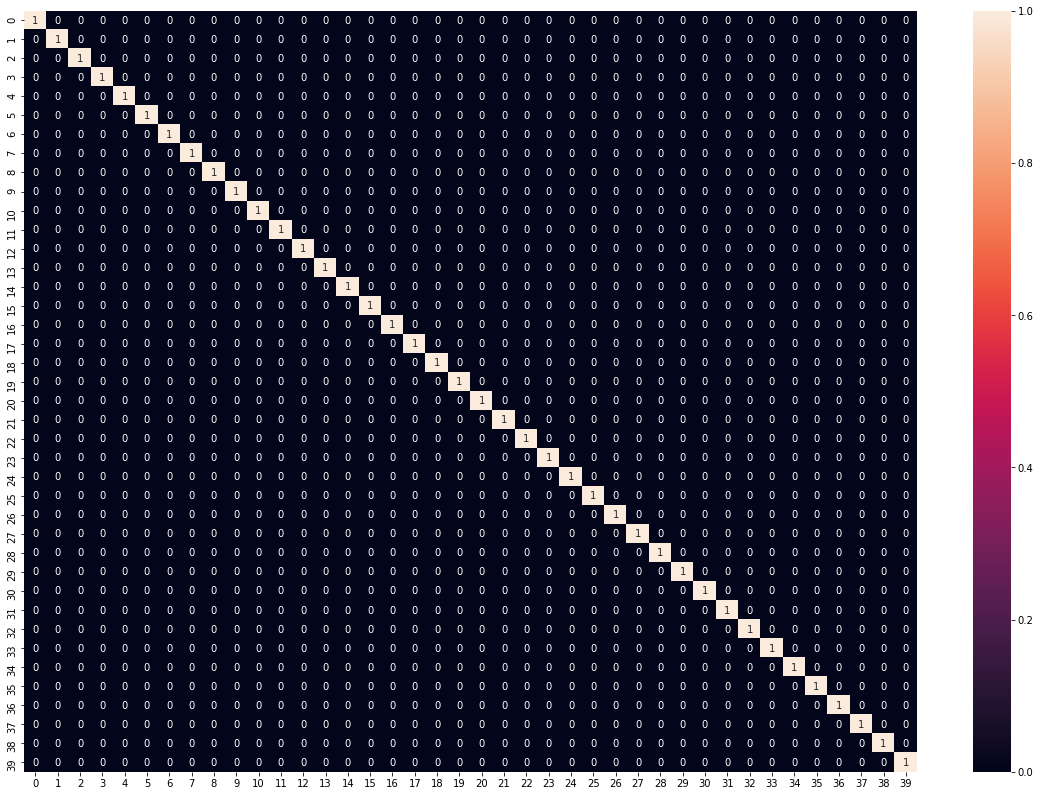

In [19]:
df_cm = pd.DataFrame(conf_matrix)
plt.figure(figsize = (10*2,7*2))
sn.heatmap(df_cm, annot=True)

### 2. Second case, KNN with mean square error


In [20]:
def knn(subjects, dataset, mode):
    
    nearest_indexes = []
    nearest_labels = []
    
    for i, labeless_image in enumerate(subjects):
        
        nearest = math.inf
        nearest_index = 0
        
        for j, labeled_image in enumerate(dataset):
            
            if mode == 'r':
                mse = mean_squared_error(labeled_image.real, labeless_image.real)
            if mode == 'i':
                mse = mean_squared_error(labeled_image.imag, labeless_image.imag)
            if mode == 'ri':
                mse_real = mean_squared_error(labeled_image.real, labeless_image.real)
                mse_imag = mean_squared_error(labeled_image.imag, labeless_image.imag)
                mse = mse_real + mse_imag
            if mse < nearest:
                nearest = mse
                nearest_index = j
        nearest_indexes.append(nearest_index)
        nearest_labels.append(labels[nearest_index])
        
    return nearest_labels

In [21]:
dimensions = [i for i in range(2,31)]

labels_predict_real = []

for dimension in dimensions:
    print("Dimension: ", dimension)
    subject = [crop_img(dimension, i) for i in people_unique_fft_s]
    dataset = [crop_img(dimension, i) for i in people_fft_s]
    labels_predict_real.append(knn(subject, dataset, 'r'))

Dimension:  2
Dimension:  3
Dimension:  4
Dimension:  5
Dimension:  6
Dimension:  7
Dimension:  8
Dimension:  9
Dimension:  10
Dimension:  11
Dimension:  12
Dimension:  13
Dimension:  14
Dimension:  15
Dimension:  16
Dimension:  17
Dimension:  18
Dimension:  19
Dimension:  20
Dimension:  21
Dimension:  22
Dimension:  23
Dimension:  24
Dimension:  25
Dimension:  26
Dimension:  27
Dimension:  28
Dimension:  29
Dimension:  30


In [22]:
np.array(labels_predict_real).shape

(29, 40)

In [23]:
from sklearn.metrics import accuracy_score

y_true = [i for i in range(0,40)]

graph_real = []

for i, y_pred in enumerate(labels_predict_real):
    print("For dimension {:2}, and using only real the result is: {} {}" .format((i+2), accuracy_score(y_true, y_pred), accuracy_score(y_true, y_pred, normalize=False)))
    graph_real.append([accuracy_score(y_true, y_pred), i+2])

For dimension  2, and using only real the result is: 0.9 36
For dimension  3, and using only real the result is: 0.975 39
For dimension  4, and using only real the result is: 0.975 39
For dimension  5, and using only real the result is: 0.975 39
For dimension  6, and using only real the result is: 0.975 39
For dimension  7, and using only real the result is: 0.975 39
For dimension  8, and using only real the result is: 1.0 40
For dimension  9, and using only real the result is: 1.0 40
For dimension 10, and using only real the result is: 1.0 40
For dimension 11, and using only real the result is: 1.0 40
For dimension 12, and using only real the result is: 1.0 40
For dimension 13, and using only real the result is: 1.0 40
For dimension 14, and using only real the result is: 1.0 40
For dimension 15, and using only real the result is: 1.0 40
For dimension 16, and using only real the result is: 1.0 40
For dimension 17, and using only real the result is: 1.0 40
For dimension 18, and using on

In [24]:
graph_real

[[0.9, 2],
 [0.975, 3],
 [0.975, 4],
 [0.975, 5],
 [0.975, 6],
 [0.975, 7],
 [1.0, 8],
 [1.0, 9],
 [1.0, 10],
 [1.0, 11],
 [1.0, 12],
 [1.0, 13],
 [1.0, 14],
 [1.0, 15],
 [1.0, 16],
 [1.0, 17],
 [1.0, 18],
 [1.0, 19],
 [1.0, 20],
 [1.0, 21],
 [1.0, 22],
 [1.0, 23],
 [1.0, 24],
 [1.0, 25],
 [1.0, 26],
 [1.0, 27],
 [1.0, 28],
 [1.0, 29],
 [1.0, 30]]

### Histogram of real iteration

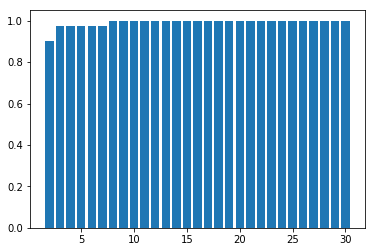

In [25]:
graph_real = np.array(graph_real).transpose()

plt.bar(graph_real[1], graph_real[0])
plt.show()

# IMAGINARY ONLY

In [26]:
dimensions = [i for i in range(2,31)]

labels_predict_imag = []

for dimension in dimensions:
    print("Dimension: ", dimension)
    subject = [crop_img(dimension, i) for i in people_unique_fft_s]
    dataset = [crop_img(dimension, i) for i in people_fft_s]
    labels_predict_imag.append(knn(subject, dataset, 'i'))

Dimension:  2
Dimension:  3
Dimension:  4
Dimension:  5
Dimension:  6
Dimension:  7
Dimension:  8
Dimension:  9
Dimension:  10
Dimension:  11
Dimension:  12
Dimension:  13
Dimension:  14
Dimension:  15
Dimension:  16
Dimension:  17
Dimension:  18
Dimension:  19
Dimension:  20
Dimension:  21
Dimension:  22
Dimension:  23
Dimension:  24
Dimension:  25
Dimension:  26
Dimension:  27
Dimension:  28
Dimension:  29
Dimension:  30


In [27]:
np.array(labels_predict_imag).shape

(29, 40)

In [28]:
from sklearn.metrics import accuracy_score

y_true = [i for i in range(0,40)]

graph_imag = []

for i, y_pred in enumerate(labels_predict_imag):
    print("For dimension {:2}, and using only imaginary the result is: {} {}" .format((i+2), accuracy_score(y_true, y_pred), accuracy_score(y_true, y_pred, normalize=False)))
    graph_imag.append([accuracy_score(y_true, y_pred), i+2])

For dimension  2, and using only imaginary the result is: 0.5 20
For dimension  3, and using only imaginary the result is: 0.875 35
For dimension  4, and using only imaginary the result is: 0.925 37
For dimension  5, and using only imaginary the result is: 0.925 37
For dimension  6, and using only imaginary the result is: 0.925 37
For dimension  7, and using only imaginary the result is: 0.95 38
For dimension  8, and using only imaginary the result is: 0.95 38
For dimension  9, and using only imaginary the result is: 0.95 38
For dimension 10, and using only imaginary the result is: 0.95 38
For dimension 11, and using only imaginary the result is: 0.95 38
For dimension 12, and using only imaginary the result is: 0.95 38
For dimension 13, and using only imaginary the result is: 0.95 38
For dimension 14, and using only imaginary the result is: 0.95 38
For dimension 15, and using only imaginary the result is: 0.95 38
For dimension 16, and using only imaginary the result is: 0.95 38
For dim

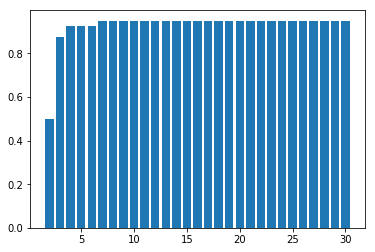

In [29]:
graph_imag = np.array(graph_imag).transpose()

plt.bar(graph_imag[1], graph_imag[0])
plt.show()

# REAL + IMAGINARY

In [30]:
dimensions = [i for i in range(2,31)]

labels_predict_real_imag = []

for dimension in dimensions:
    print("Dimension: ", dimension)
    subject = [crop_img(dimension, i) for i in people_unique_fft_s]
    dataset = [crop_img(dimension, i) for i in people_fft_s]
    labels_predict_real_imag.append(knn(subject, dataset, 'ri'))

Dimension:  2
Dimension:  3
Dimension:  4
Dimension:  5
Dimension:  6
Dimension:  7
Dimension:  8
Dimension:  9
Dimension:  10
Dimension:  11
Dimension:  12
Dimension:  13
Dimension:  14
Dimension:  15
Dimension:  16
Dimension:  17
Dimension:  18
Dimension:  19
Dimension:  20
Dimension:  21
Dimension:  22
Dimension:  23
Dimension:  24
Dimension:  25
Dimension:  26
Dimension:  27
Dimension:  28
Dimension:  29
Dimension:  30


In [31]:
np.array(labels_predict_real_imag).shape

(29, 40)

In [32]:
from sklearn.metrics import accuracy_score

y_true = [i for i in range(0,40)]

graph_real_imag = []

for i, y_pred in enumerate(labels_predict_real_imag):
    print("For dimension {:2}, and using real and imaginary values, the result is: {} {}" .format((i+2), accuracy_score(y_true, y_pred), accuracy_score(y_true, y_pred, normalize=False)))
    graph_real_imag.append([accuracy_score(y_true, y_pred), i+2])

For dimension  2, and using real and imaginary values, the result is: 0.975 39
For dimension  3, and using real and imaginary values, the result is: 0.975 39
For dimension  4, and using real and imaginary values, the result is: 0.975 39
For dimension  5, and using real and imaginary values, the result is: 0.95 38
For dimension  6, and using real and imaginary values, the result is: 0.95 38
For dimension  7, and using real and imaginary values, the result is: 0.95 38
For dimension  8, and using real and imaginary values, the result is: 0.95 38
For dimension  9, and using real and imaginary values, the result is: 0.95 38
For dimension 10, and using real and imaginary values, the result is: 0.95 38
For dimension 11, and using real and imaginary values, the result is: 0.95 38
For dimension 12, and using real and imaginary values, the result is: 0.95 38
For dimension 13, and using real and imaginary values, the result is: 0.95 38
For dimension 14, and using real and imaginary values, the re

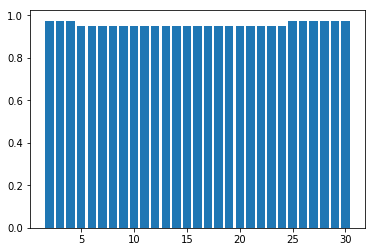

In [33]:
graph_real_imag = np.array(graph_real_imag).transpose()

plt.bar(graph_real_imag[1], graph_real_imag[0])
plt.show()

# REAL AND IMAGINARY

In [34]:
def knn_for_last_exemple(subjects, dataset):
    
    nearest_indexes = []
    nearest_labels = []
    
    for i, labeless_image in enumerate(subjects):
        
        nearest = math.inf
        nearest_index = 0
        
        for j, labeled_image in enumerate(dataset):
            mse_real_imag = mean_squared_error(labeled_image.real, labeless_image.imag)
            mse_imag_real = mean_squared_error(labeled_image.imag, labeless_image.real)
            mse_real = mean_squared_error(labeled_image.real, labeless_image.real)
            mse_imag = mean_squared_error(labeled_image.imag, labeless_image.imag)

            distance_list = [mse_real_imag, mse_imag_real, mse_real, mse_imag]
            mse = sorted(distance_list)[0]
            if mse < nearest:
                nearest = mse
                nearest_index = j
        nearest_indexes.append(nearest_index)
        nearest_labels.append(labels[nearest_index])
        
    return nearest_labels

In [35]:
dimensions = [i for i in range(2,31)]

labels_predict_real_and_imag = []

for dimension in dimensions:
    print("Dimension: ", dimension)
    subject = [crop_img(dimension, i) for i in people_unique_fft_s]
    dataset = [crop_img(dimension, i) for i in people_fft_s]
    labels_predict_real_and_imag.append(knn_for_last_exemple(subject, dataset))

Dimension:  2
Dimension:  3
Dimension:  4
Dimension:  5
Dimension:  6
Dimension:  7
Dimension:  8
Dimension:  9
Dimension:  10
Dimension:  11
Dimension:  12
Dimension:  13
Dimension:  14
Dimension:  15
Dimension:  16
Dimension:  17
Dimension:  18
Dimension:  19
Dimension:  20
Dimension:  21
Dimension:  22
Dimension:  23
Dimension:  24
Dimension:  25
Dimension:  26
Dimension:  27
Dimension:  28
Dimension:  29
Dimension:  30


In [36]:
np.array(labels_predict_real_and_imag).shape

(29, 40)

In [37]:
from sklearn.metrics import accuracy_score

y_true = [i for i in range(0,40)]

graph_real_and_imag = []


for i, y_pred in enumerate(labels_predict_real_and_imag):
    print("For dimension {:2}, and using real and imaginary values, the result is: {} {}" .format((i+2), accuracy_score(y_true, y_pred), accuracy_score(y_true, y_pred, normalize=False)))
    graph_real_and_imag.append([accuracy_score(y_true, y_pred), i+2])

For dimension  2, and using real and imaginary values, the result is: 0.575 23
For dimension  3, and using real and imaginary values, the result is: 0.9 36
For dimension  4, and using real and imaginary values, the result is: 0.95 38
For dimension  5, and using real and imaginary values, the result is: 0.95 38
For dimension  6, and using real and imaginary values, the result is: 0.95 38
For dimension  7, and using real and imaginary values, the result is: 0.95 38
For dimension  8, and using real and imaginary values, the result is: 0.95 38
For dimension  9, and using real and imaginary values, the result is: 0.95 38
For dimension 10, and using real and imaginary values, the result is: 0.95 38
For dimension 11, and using real and imaginary values, the result is: 0.95 38
For dimension 12, and using real and imaginary values, the result is: 0.975 39
For dimension 13, and using real and imaginary values, the result is: 0.975 39
For dimension 14, and using real and imaginary values, the res

### Histogram for the real and imaginary.

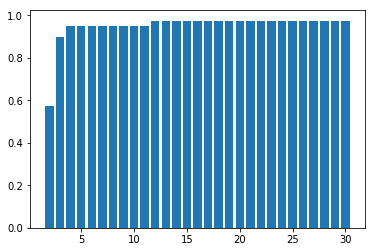

In [38]:
graph_real_and_imag = np.array(graph_real_and_imag).transpose()

plt.bar(graph_real_and_imag[1], graph_real_and_imag[0])
plt.show()

# Testing the knn 
Altering the dataset that picture 1 of person 1 now is picture 1 of person 2 and picture 1 for person 2 is picture 1 of person 2

In [39]:
%ls

 may-7-update.ipynb*                    orl_faces.zip*
'Notes from final project'/             plot_regression.ipynb*
'Notes from final project.zip'*        'Primeiros Passos.ipynb'*
 orl_faces/                             Projeto.ipynb*
 orl_faces_first_image_changed_12_21/   README.md*


### COLLECTING DATA

In [40]:
subjects_quantity = 40
sbj_photos = 10

people_raw = list() # ALL 10 PHOTOS FROM EACH PERSON
people_subjects = list() # FIRST PHOTO FROM EACH PERSON
people_dataset_raw = list() # 9 PHOTOS FOR EACH PERSON DATASET

for j in range(1, subjects_quantity+1):
    # For para cada imagem
    for i in range(1, sbj_photos+1):
        people_raw.append(np.array(cv2.imread(f'./orl_faces_first_image_changed_12_21/orl_faces/s{j}/{i}.pgm',0)))
        if i == 1:
            people_subjects.append(np.array(cv2.imread(f'./orl_faces_first_image_changed_12_21/orl_faces/s{j}/{i}.pgm',0)))
        if i != 1:
            people_dataset_raw.append(np.array(cv2.imread(f'./orl_faces_first_image_changed_12_21/orl_faces/s{j}/{i}.pgm',0)))

In [41]:
print(f"Dataset size: {len(people_dataset_raw)}")

Dataset size: 360


### RAW DATA SHOW UP

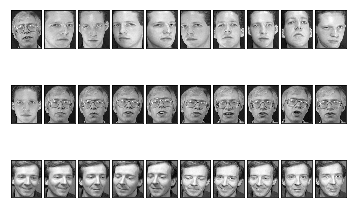

In [43]:
nrows, ncols = 3, 10

for j in range(0,nrows*ncols,10):
    for i in range(1,11):
        plt.subplot(nrows, ncols, i + j)
        plt.imshow(people_raw[i-1 + j], cmap = 'gray')
        plt.xticks([]), plt.yticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.show()

### BELOW, ALL THE ARRAYS ARE DATASET ONLY

Creating an array with fourier transform from raw data set array:

In [44]:
people_fft = [np.fft.fft2(person) for person in people_dataset_raw]

people_unique_fft = [np.fft.fft2(person) for person in people_subjects]

'people_fft' is now an array containing a fourier transformed version of each photo from the dataset.

To conclude an ideal analysis, the original fourier transformed image is not the easiest data to work with, so, the purpose of the next command is to create a  version of each imagem with it's relative relevant data shifted to the center of the picture.

In [45]:
people_fft_s = [np.fft.fftshift(person) for person in people_fft]

people_unique_fft_s = [np.fft.fftshift(person) for person in people_unique_fft]

Now, showing one example from the raw data, the fourier transformed, and the shifted one:

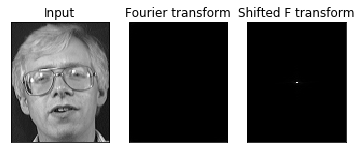

In [46]:
plt.subplot(131)
plt.imshow(people_raw[0], cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(np.abs(people_fft[0]), cmap = 'gray')
plt.title('Fourier transform'), plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(np.abs(people_fft_s[0]), cmap = 'gray')
plt.title('Shifted F transform'), plt.xticks([]), plt.yticks([])

plt.show()

### FINISHED SETUP

## STARTING THE PROJECT

The next part of the project consists in:

1. Create the list of redimensioned image
1. Analyze the Mean Square Error (MSE)
1. Classify samples from MSE


### 1. Create the list of redimensioned image:
    we need to create a function that returns only the relevant part of the image. That integer input will be the dimensions of the usable image data. The dimensions used in this projest are: 2x2 until 30x30

In [47]:
#cut image according to the last dimension
def crop_img(n, image):
    #current dimensions of imagens in the database
    image_width = 92
    image_height = 112
    
    # center of the image
    x = image_height//2
    y = image_width//2
    
    # RADIUS OF THE AREA
    r = n//2
    
    odd = 0
    #testing if image is odd
    if n % 2 != 0:
        odd = -1
    
    return image[x-r+odd:x+r,y-r+odd:y+r]

In [48]:
people = np.array(people_fft_s)
people.shape

(360, 112, 92)

In [49]:
cropped = crop_img(30, people_raw[0])
cropped.shape

(30, 30)

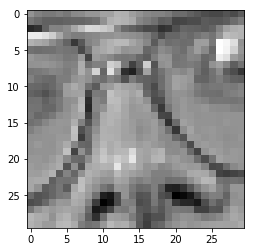

In [50]:
#show redimensioned image
plt.imshow(cropped, "gray")

### 2. Analyze the Mean Square Error (MSE):
    we need to create a function that calculate the distante between the samples and the image that we want classify, for that we testing two algorits:

1. First case with SkLearn


2. Second case with other implementation

Cropped all datasets

In [51]:
#define dimension range
dimension = 30
#to original image, labeled
crop_full = []
# to each user, labeless
crop_unique = []
# to add crop image in crop_full, unidimensional array
for image in people_fft_s:
    crop_full.append(np.array(crop_img(dimension, image)).flatten())
    
# to add crop image in crop_full, unidimensional array  
for image in people_unique_fft_s:
    crop_unique.append(np.array(crop_img(dimension, image)).flatten())

### 1. First case with SkLearn

In [52]:
X = np.array(crop_full)
X.shape

(360, 900)

##### Labels to KNN

In [53]:
labels = [i for i in range(40) for j in range(9)]
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 3

#### Declaring machine learn

In [54]:
#constructor of KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=1, metric="euclidean")

In [55]:
#fit receive parameters to learn
neigh.fit(X.real, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [56]:
y_predict = []

for image in crop_unique:
    y_predict.append(neigh.predict([image.real]))
    print(neigh.predict([image.real]), end= " ")
#casting to transform the array in np_array
y_predict = np.array(y_predict)



[1] [0] [2] [3] [4] [5] [6] [7] [8] [9] [10] [11] [12] [13] [14] [15] [16] [17] [18] [19] [20] [21] [22] [23] [24] [25] [26] [27] [28] [29] [30] [31] [32] [33] [34] [35] [36] [37] [38] [39] 

In [57]:
# list of correct labels
y_true = [i for i in range(0,40)]
y_pred = y_predict

conf_matrix = confusion_matrix(y_true, y_pred)

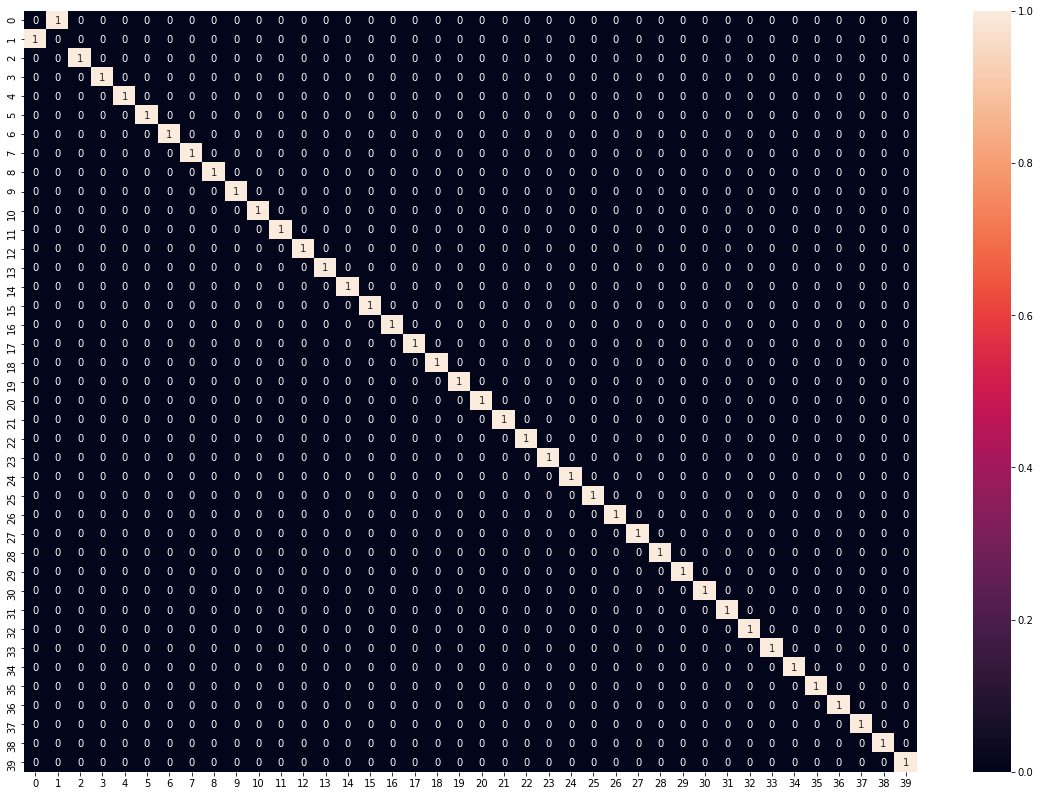

In [58]:
df_cm = pd.DataFrame(conf_matrix)
plt.figure(figsize = (10*2,7*2))
sn.heatmap(df_cm, annot=True)

### 2. Second case, KNN with mean square error


In [59]:
def knn(subjects, dataset, mode):
    
    nearest_indexes = []
    nearest_labels = []
    
    for i, labeless_image in enumerate(subjects):
        
        nearest = math.inf
        nearest_index = 0
        
        for j, labeled_image in enumerate(dataset):
            
            if mode == 'r':
                mse = mean_squared_error(labeled_image.real, labeless_image.real)
            if mode == 'i':
                mse = mean_squared_error(labeled_image.imag, labeless_image.imag)
            if mode == 'ri':
                mse_real = mean_squared_error(labeled_image.real, labeless_image.real)
                mse_imag = mean_squared_error(labeled_image.imag, labeless_image.imag)
                mse = mse_real + mse_imag
            if mse < nearest:
                nearest = mse
                nearest_index = j
        nearest_indexes.append(nearest_index)
        nearest_labels.append(labels[nearest_index])
        
    return nearest_labels

In [60]:
dimensions = [i for i in range(2,31)]

labels_predict_real = []

for dimension in dimensions:
    print("Dimension: ", dimension)
    subject = [crop_img(dimension, i) for i in people_unique_fft_s]
    dataset = [crop_img(dimension, i) for i in people_fft_s]
    labels_predict_real.append(knn(subject, dataset, 'r'))

Dimension:  2
Dimension:  3
Dimension:  4
Dimension:  5
Dimension:  6
Dimension:  7
Dimension:  8
Dimension:  9
Dimension:  10
Dimension:  11
Dimension:  12
Dimension:  13
Dimension:  14
Dimension:  15
Dimension:  16
Dimension:  17
Dimension:  18
Dimension:  19
Dimension:  20
Dimension:  21
Dimension:  22
Dimension:  23
Dimension:  24
Dimension:  25
Dimension:  26
Dimension:  27
Dimension:  28
Dimension:  29
Dimension:  30


In [61]:
np.array(labels_predict_real).shape

(29, 40)

In [68]:
from sklearn.metrics import accuracy_score

y_true = [i for i in range(0,40)]

graph_real = []

for i, y_pred in enumerate(labels_predict_real):
    print("For dimension {:2}, and using only real the result is: {} {}" .format((i+2), accuracy_score(y_true, y_pred), accuracy_score(y_true, y_pred, normalize=False)))
    graph_real.append([accuracy_score(y_true, y_pred), i+2])

For dimension  2, and using only real the result is: 0.875 35
For dimension  3, and using only real the result is: 0.925 37
For dimension  4, and using only real the result is: 0.925 37
For dimension  5, and using only real the result is: 0.925 37
For dimension  6, and using only real the result is: 0.925 37
For dimension  7, and using only real the result is: 0.925 37
For dimension  8, and using only real the result is: 0.95 38
For dimension  9, and using only real the result is: 0.95 38
For dimension 10, and using only real the result is: 0.95 38
For dimension 11, and using only real the result is: 0.95 38
For dimension 12, and using only real the result is: 0.95 38
For dimension 13, and using only real the result is: 0.95 38
For dimension 14, and using only real the result is: 0.95 38
For dimension 15, and using only real the result is: 0.95 38
For dimension 16, and using only real the result is: 0.95 38
For dimension 17, and using only real the result is: 0.95 38
For dimension 18, 

### The result isn't 1.00 or 40 because the two photos are wrongs, proof that the programm works.

In [69]:
graph_real

[[0.875, 2],
 [0.925, 3],
 [0.925, 4],
 [0.925, 5],
 [0.925, 6],
 [0.925, 7],
 [0.95, 8],
 [0.95, 9],
 [0.95, 10],
 [0.95, 11],
 [0.95, 12],
 [0.95, 13],
 [0.95, 14],
 [0.95, 15],
 [0.95, 16],
 [0.95, 17],
 [0.95, 18],
 [0.95, 19],
 [0.95, 20],
 [0.95, 21],
 [0.95, 22],
 [0.95, 23],
 [0.95, 24],
 [0.95, 25],
 [0.95, 26],
 [0.95, 27],
 [0.95, 28],
 [0.95, 29],
 [0.95, 30]]

### Histogram of real iteration

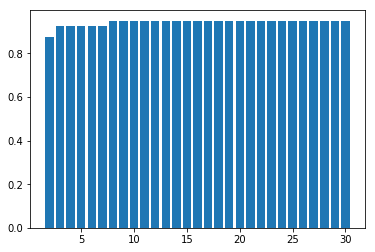

In [70]:
graph_real = np.array(graph_real).transpose()

plt.bar(graph_real[1], graph_real[0])
plt.show()